Assignment 05
Out: 12/04 19:00
Due: 12/18 19:00

Instructions
Collaboration:

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own.

There are two requirements for collaboration:

Cite your collaborators fully and completely (e.g., “XXX explained to me what is asked in problem set 3”). Or cite online resources (e.g., “I got inspired by reading XXX”) that helped you.

Write your scripts and report independently - the scripts and report must come from you only.

Submitting your assignment:

Please write a report PS5.pdf.

Create a jupyter notebook named PS5.ipynb.

Upload your jupyter notebook and report to your Github ESE5023_Assignments_XXX repository (where XXX is your SUSTech ID) before the due time.

Late Submission:

Late submissions will not receive any credit. The submission time will be determined based on your latest GitHub file records.

1. Modeling of carbon cycle
In this problem, we will build a box model to understand the Earth’s carbon cycle based on the framework in Tomizuka 2009.

1.1 [15 points] Following equation 1-2 (without the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm (parts per million) from 1987 to 2004.

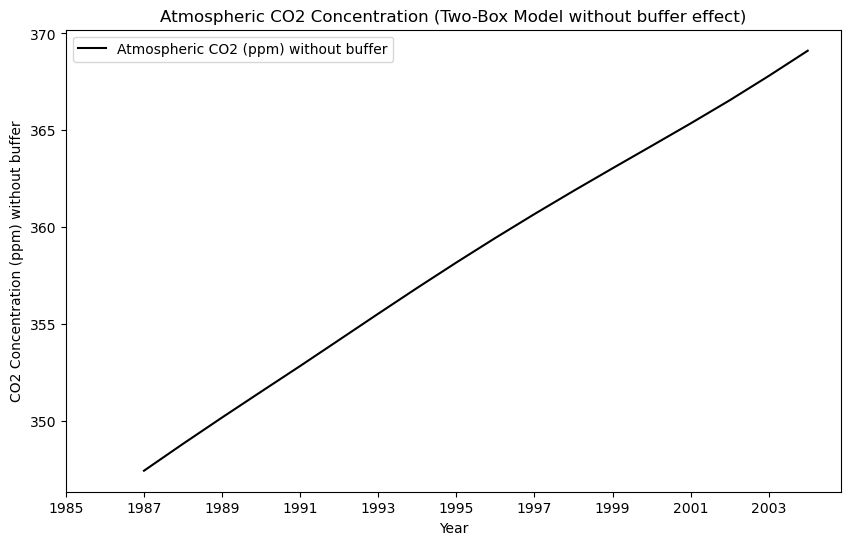

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.ticker import MaxNLocator

# 参数定义
# 从大气到海洋表面的碳转移系数
k12 = 105 / 740
# 从海洋表面到大气的碳转移系数
k21 = 102 / 900
# 化石燃料燃烧产生的CO2排放率（PgC/年）
gamma = 6.0

# 初始条件
# 1986年大气中的碳含量（PgC）
N1_initial_pg = 740
# 1986年海洋表面的碳含量（PgC）
N2_initial_pg = 900

# 转换ppm 
N1_initial_ppm = N1_initial_pg / 2.13
N2_initial_ppm = N2_initial_pg / 2.13
gamma_ppm = gamma / 2.13

# 定义微分方程
def co2_model_without_buffer(t, y):
    N1, N2 = y
    dN1_dt = -k12 * N1 + k21 * N2 + gamma_ppm
    dN2_dt = k12 * N1 - k21 * N2
    return [dN1_dt, dN2_dt]

# 时间范围
years = np.arange(1987, 2005)
# 时间跨度
t_span = (0, len(years) - 1)
# 初始条件
y0 = [N1_initial_ppm, N2_initial_ppm]

# 求解微分方程
solution_without_buffer = solve_ivp(co2_model_without_buffer, t_span, y0, t_eval=np.arange(len(years)))
# 获取结果
N1_ppm_without_buffer = solution_without_buffer.y[0]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(years, N1_ppm_without_buffer, label='Atmospheric CO2 (ppm) without buffer', color='black')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm) without buffer')
plt.title('Atmospheric CO2 Concentration (Two-Box Model without buffer effect)')
plt.xticks(np.arange(1985, 2005, 2))
plt.legend()
plt.grid(False)
plt.show()

1.2 [20 points] Following equation 3-4 (with the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm from 1987 to 2004.

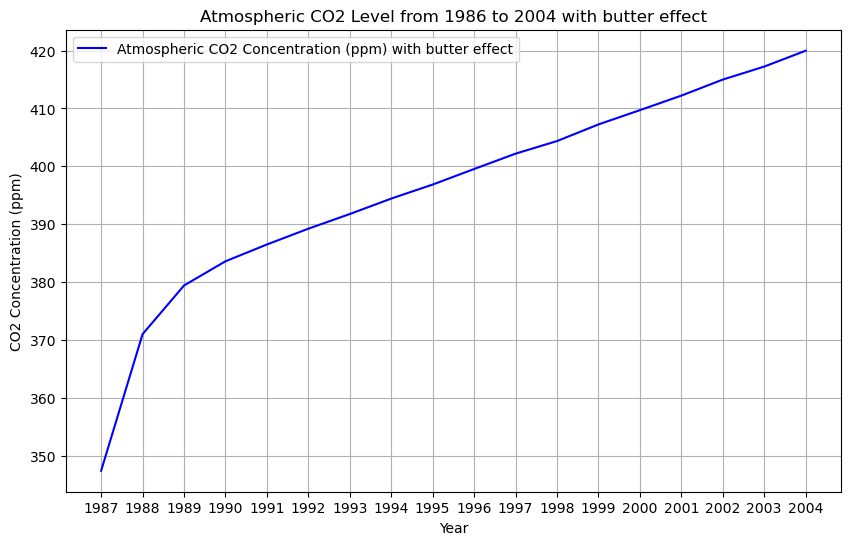

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.ticker import MaxNLocator

# 参数定义
# 从大气到海洋表面的碳转移系数
k12 = 105 / 740
# 从海洋表面到大气的碳转移系数
k21 = 102 / 900
# 人为排放的碳率（PgC/年）
gamma = 6.0
# PgC 转 ppm 转换系数
conversion_factor = 2.13

# 初始条件（PgC）
# 1986年大气中的碳含量（PgC）
N1_initial_pg = 740
# 1986年海洋表面的碳含量（PgC）
N2_initial_pg = 900
# 前工业时代的海洋表面碳平衡值（PgC）
N2_prime_pg = 821

# 转换ppm 
N1_initial_ppm = N1_initial_pg / 2.13
N2_initial_ppm = N2_initial_pg / 2.13
N2_prime_ppm = N2_prime_pg / 2.13
gamma_ppm = gamma / 2.13 #ppm

# 定义微分方程
def co2_model_with_buffer(t, y):
    N1, N2 = y
    #缓冲因子
    buffer_factor = 3.69 + 1.86e-2 * N1 - 1.8e-6 * N1**2
    dN1_dt = -k12 * N1 + k21 * (N2_prime_ppm + buffer_factor * (N2 - N2_prime_ppm)) + gamma_ppm
    dN2_dt = k12 * N1 - k21 * (N2_prime_ppm + buffer_factor * (N2 - N2_prime_ppm))
    return [dN1_dt, dN2_dt]

# 时间范围
years = np.arange(1987, 2005)

# 时间跨度
t_span = (0, len(years) - 1)

# 初始条件
y0_buffer= [N1_initial_ppm, N2_initial_ppm]

# 求解微分方程
solution_with_buffer= solve_ivp(co2_model_with_buffer, t_span, y0_buffer, t_eval=np.arange(len(years)))

# 获取结果
N1_values_with_buffer= solution_with_buffer.y[0]

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(years, N1_values_with_buffer, label='Atmospheric CO2 Concentration (ppm) with butter effect', color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Level from 1986 to 2004 with butter effect')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.show()

1.3 [5 points] Based on your results from 1.1 and 1.2, reproduce Figure 2 in Tomizuka (2009) as much as you can.

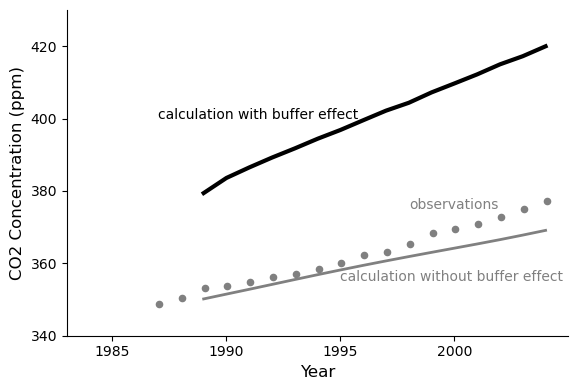

In [98]:
import pandas as pd

# 观测数据
file_path = r'D:\jupyter\co2_mm_mlo.csv'
data = pd.read_csv(file_path, comment='#')
data = data[['year', 'month', 'decimal date', 'average']]

# 提取1987-2004年的数据
data = data[(data['year'] >= 1987) & (data['year'] <= 2004)]

# 选择部分数据点绘制
subset = data.iloc[::12, :]  # 每隔12个数据点取一个点

# 绘图
plt.figure(figsize=(6, 4))
plt.plot(years[2:], N1_values_with_buffer[2:], color='black', linewidth=3, label='Calculation with buffer effect')
plt.text(1987, 400, 'calculation with buffer effect', fontsize=10, color='black')  #定位标签位置
plt.plot(years[2:], N1_ppm_without_buffer[2:], color='gray', linewidth=2, label='Calculation without buffer effect')
plt.text(1995, 355, 'calculation without buffer effect', fontsize=10, color='gray')  #定位标签位置
plt.scatter(subset['decimal date'], subset['average'], color='gray', s=20, label='Observations')
plt.text(1998, 375, 'observations', fontsize=10, color='gray')  #定位标签位置
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.xticks(np.arange(1985, 2005, 5))
plt.yticks(np.arange(340, 430, 20))
plt.xlim(1983, 2005)
plt.ylim(340, 430)
plt.grid(False)

# 移除顶部和右侧框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

[Bonus] [10 points] Following equation 5-13, compute the atmospheric CO2 level in ppm and reproduce Figure 4 in Tomizuka (2009).

Useful data sets:

Global Fossil-Fuel CO2 Emissions
Mauna Loa CO2 annual mean data
Historical CO2 Records from the Law Dome DE08, DE08-2, and DSS Ice Cores

In [111]:
#数据准备，网站下载houghton土地利用对碳通量的1850-2000数据--本题是上本课程的赵东伟同学教我的非常感谢赵东伟同学的细心指导
import numpy as np
import pandas as pd
#线性插值1750-1850数据
# 设置年份范围：1750到1850
years = np.arange(1750, 1851)

# 设定1750和1850年的排放量（单位PgC）
flux_1750 = 0.2  # PgC
flux_1850 = 0.5  # PgC

# 线性插值，生成介于1750和1850年之间的排放量
flux_values_pg = np.linspace(flux_1750, flux_1850, len(years)) 

# 转换为TgC（1 PgC = 10^3 TgC）
flux_values_tg = flux_values_pg * 1000  # 将PgC转换为TgC

# 创建数据框架：1750-1850年的数据
df_1750 = pd.DataFrame({
    'Year': years,
    'Total Flux (TgC)': flux_values_tg
})
# print(df_1750)
# 读取Houghton的实际数据
file_path = r'D:\jupyter\houghtondata.txt'
df = pd.read_csv(file_path, sep='\\s+', skiprows=10)
first_column = df.iloc[:, 0]
last_column = df.iloc[:, -1]

# 将第一列和最后一列合并为一个新的数据框
df_1850 = pd.concat([first_column, last_column], axis=1)
df_1850.columns = ['Year', 'Total Flux (TgC)']
# print(df_1850)

# 合并 df_1750 和 df_1850
df_combined = pd.concat([df_1750, df_1850], ignore_index=True)

# 保存为 Land_use_1750_2000.txt 文件
df_combined.to_csv('Land_use_1750_2000.txt', sep='\t', index=False)

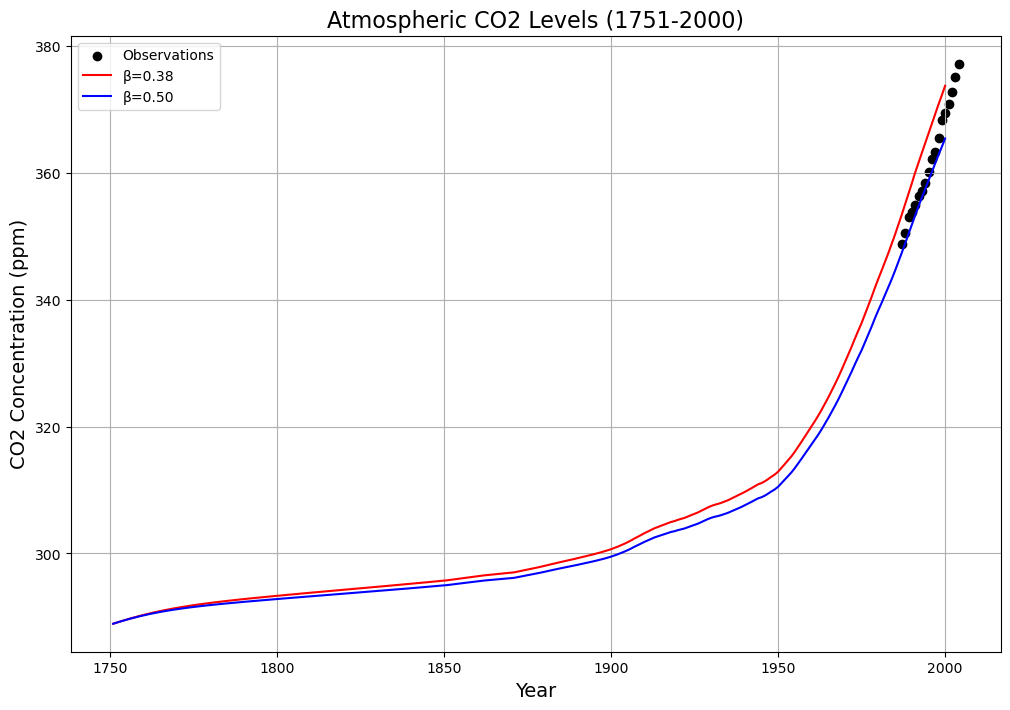

In [119]:
#CO2 data
# CO2_ob = 1750的数据找不到
#Land use Carbon flux
Global_land_use = pd.read_csv('Land_use_1750_2000.txt', sep='\t')  #TgC

# print(Global_land_use.columns)
Global_land_use = Global_land_use[['Year', 'Total Flux (TgC)']]
Global_land_use['LandUseChange'] = Global_land_use['Total Flux (TgC)'] / (1000 * 2.13)  #ppm

# 化石燃料排放数据
Global_emissions = pd.read_csv('global.1751_2014.ems', skiprows=33, sep='\\s+')
Global_emissions['FossilFuelEmissions'] = Global_emissions['Total'] - Global_emissions['Production']
Global_emissions['EmissionFactor'] = Global_emissions['FossilFuelEmissions'] / (1000 * 2.13)
# print(Global_emissions.head)

# 传输系数
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1238

# 初始条件（ppm）
N1_0 = 615 / 2.13
N2_0 = 842 / 2.13
N3_0 = 9744 / 2.13
N4_0 = 26280 / 2.13
N5_0 = 90000000 / 2.13
N6_0 = 731 / 2.13
N7_0 = 1238 / 2.13

#设定f0和P0
f0 = 62 / 2.13
P0 = 615 / 2.13

#时间
years = np.arange(1751, 2001)

#设定beta值
beta_values = [0.38, 0.5]
results = []

# 计算 CO2 浓度
for beta in beta_values:
    N1, N2, N3, N4, N5, N6, N7 = N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0
    atmosphere = []

    for year in years:
        gamma = Global_emissions[Global_emissions['Year'] == year]['EmissionFactor'].values[0]
        delta = Global_land_use[Global_land_use['Year'] == year]['LandUseChange'].values[0]

        xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2
        f = f0 * (1 + beta * np.log(N1 / P0))

        # 计算每个部分的变化率
        dN1_dt = (-k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7)
        dN2_dt = (k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)) - k23 * N2 + k32 * N3 - k24 * N2)
        dN3_dt = (k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4)
        dN4_dt = (k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4)
        dN5_dt = (k45 * N4 - k51 * N5)
        dN6_dt = (f - k67 * N6 - 2 * delta)
        dN7_dt = (k67 * N6 - k71 * N7 + delta)

        # 更新每个部分的值
        N1 += dN1_dt
        N2 += dN2_dt
        N3 += dN3_dt
        N4 += dN4_dt
        N5 += dN5_dt
        N6 += dN6_dt
        N7 += dN7_dt

        atmosphere.append(N1)

    results.append(atmosphere)

# 绘图
plt.figure(figsize=(12, 8))
plt.scatter(subset['decimal date'], subset['average'], label='Observations', color='black')
plt.plot(years, results[0], color='red', label='β=0.38')
plt.plot(years, results[1], color='blue', label='β=0.50')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Atmospheric CO2 Levels (1751-2000)', fontsize=16)
plt.legend()
plt.grid()
plt.show()